In [ ]:
!unzip "/content/drive/MyDrive/kaggle/flowers.zip"

Streaming output truncated to the last 5000 lines.
  inflating: flowers/train/daisy/18582579815_4c6637e9ff_m.jpg  
  inflating: __MACOSX/flowers/train/daisy/._18582579815_4c6637e9ff_m.jpg  
  inflating: flowers/train/daisy/5434901893_4550be3f84_m.jpg  
  inflating: __MACOSX/flowers/train/daisy/._5434901893_4550be3f84_m.jpg  
  inflating: flowers/train/daisy/10172567486_2748826a8b.jpg  
  inflating: __MACOSX/flowers/train/daisy/._10172567486_2748826a8b.jpg  
  inflating: flowers/train/daisy/8671824531_64b816949e_m.jpg  
  inflating: __MACOSX/flowers/train/daisy/._8671824531_64b816949e_m.jpg  
  inflating: flowers/train/daisy/12193032636_b50ae7db35_n.jpg  
  inflating: __MACOSX/flowers/train/daisy/._12193032636_b50ae7db35_n.jpg  
  inflating: flowers/train/daisy/20619292635_9857a12d54.jpg  
  inflating: __MACOSX/flowers/train/daisy/._20619292635_9857a12d54.jpg  
  inflating: flowers/train/daisy/9146733107_98b15d3892_m.jpg  
  inflating: __MACOSX/flowers/train/daisy/._9146733107_98b15d389

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from PIL import Image  
import cv2  
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import Sequence
import cv2  
from google.colab.patches import cv2_imshow
import tensorflow as tf 
from tensorflow import keras 
from keras.applications.inception_resnet_v2 import InceptionResNetV2  
from keras.applications.inception_resnet_v2 import preprocess_input 
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Dense,Dropout,Input 
import numpy as np 
from glob import glob 
import matplotlib.pyplot as plt  
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
test=pd.read_csv("/content/flowers/Testing_set_flower.csv")  
sub=pd.read_csv("/content/flowers/sample_submission.csv")

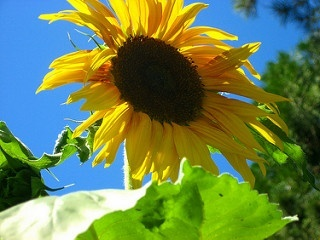

In [ ]:
image=cv2.imread('/content/flowers/test/Image_1.jpg') 
cv2_imshow(image)

In [ ]:
image.shape

(240, 320, 3)

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 preprocessing_function=preprocess_input,
                                 validation_split=0.10)   
train_generator=train_datagen.flow_from_directory(directory="/content/flowers/train",  
                                                  batch_size=100,  
                                                  seed=42,  
                                                  shuffle=True, 
                                                  class_mode="categorical",  
                                                  target_size=(229,229),
                                                  color_mode='rgb', 
                                                  subset="training") 
valid_generator=train_datagen.flow_from_directory(directory="/content/flowers/train",  
                                                  batch_size=100,  
                                                  seed=42,  
                                                  shuffle=True,  
                                                  class_mode="categorical",
                                                  color_mode='rgb',  
                                                  target_size=(229,229), 
                                                  subset="validation")
test_datagen=ImageDataGenerator(rescale=1./255, 
                                preprocessing_function=preprocess_input)  
test_generator = test_datagen.flow_from_dataframe(dataframe=test, 
                                                  x_col="filename", 
                                                  directory="/content/flowers/test/",  
                                                  class_mode=None, 
                                                  target_size=(229,229),
                                                  color_mode='rgb', 
                                                  batch_size=1, 
                                                  shuffle = False)

Found 2474 images belonging to 5 classes.
Found 272 images belonging to 5 classes.
Found 924 validated image filenames.


In [ ]:
# re-size all the images to this 
IMAGE_SIZE = [229, 229] 
# add preprocessing layer to the front of VGG 
vgg_16 = InceptionResNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False,pooling='avg')

In [ ]:
# don't train existing weights 
for layer in vgg_16.layers:
  layer.trainable = False

In [ ]:
# our layers - you can add more if you want 
x = tf.keras.layers.Flatten()(vgg_16.output) 
x1=tf.keras.layers.Dense(50,activation='relu')(x)
prediction = tf.keras.layers.Dense(5, activation='softmax')(x1) 
model = tf.keras.models.Model(inputs=vgg_16.input, outputs=prediction) 
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 229, 229, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 114, 114, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 114, 114, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 114, 114, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use 
model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history=model.fit_generator(generator=train_generator,
                            epochs=5, 
                            validation_data=valid_generator, 
                            steps_per_epoch=train_generator.n//100, 
                            validation_steps=valid_generator.n//100) #0.9978

Epoch 1/5
24/24 [==============================] - 24s 648ms/step - loss: 1.6019 - accuracy: 0.2594 - val_loss: 1.5689 - val_accuracy: 0.3200
Epoch 2/5
24/24 [==============================] - 13s 535ms/step - loss: 1.5584 - accuracy: 0.3279 - val_loss: 1.5305 - val_accuracy: 0.3450
Epoch 3/5
24/24 [==============================] - 13s 538ms/step - loss: 1.5244 - accuracy: 0.3493 - val_loss: 1.5116 - val_accuracy: 0.3200
Epoch 4/5
24/24 [==============================] - 13s 548ms/step - loss: 1.5030 - accuracy: 0.3571 - val_loss: 1.4903 - val_accuracy: 0.3550
Epoch 5/5
24/24 [==============================] - 13s 538ms/step - loss: 1.4830 - accuracy: 0.3594 - val_loss: 1.4922 - val_accuracy: 0.3350


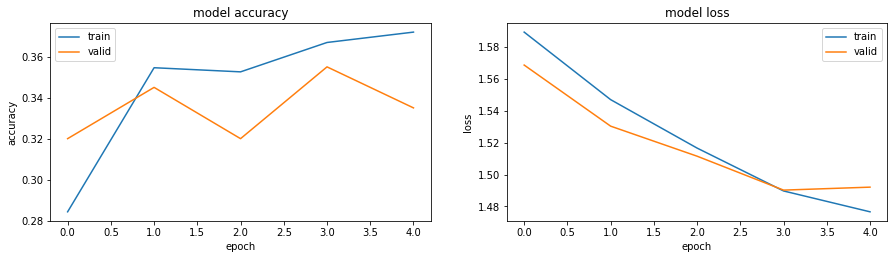

In [ ]:
plt.figure(1, figsize = (15,8))   
plt.subplot(221)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy']) 
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid'])   
plt.subplot(222)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid'])   
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

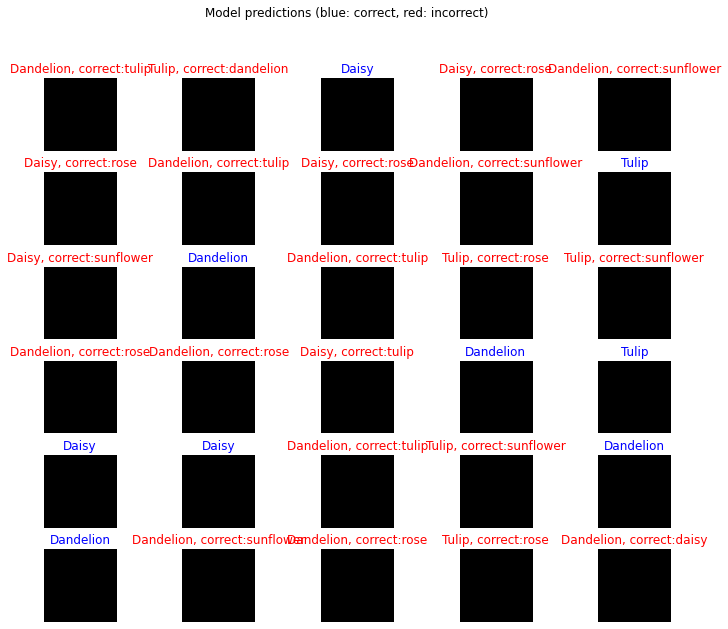

In [ ]:
batch_size=32
class_names=list(train_generator.class_indices.keys())
# get a random batch of images 
image_batch, label_batch = next(iter(valid_generator)) 
# turn the original labels into human-readable text 
label_batch = [class_names[np.argmax(label_batch[i])] for i in range(batch_size)] 
# predict the images on the model 
predicted_class_names = model.predict(image_batch) 
predicted_ids = [np.argmax(predicted_class_names[i]) for i in range(batch_size)] 
# turn the predicted vectors to human readable labels 
predicted_class_names = np.array([class_names[id] for id in predicted_ids]) 
# some nice plotting 
plt.figure(figsize=(12,10)) 
for n in range(30): 
  plt.subplot(6,5,n+1) 
  plt.subplots_adjust(hspace = 0.3) 
  plt.imshow(image_batch[n]) 
  if predicted_class_names[n] == label_batch[n]:
    color = "blue" 
    title = predicted_class_names[n].title() 
  else:
    color = "red" 
    title = f"{predicted_class_names[n].title()}, correct:{label_batch[n]}" 
  plt.title(title, color=color) 
  plt.axis('off') 
  _ = plt.suptitle("Model predictions (blue: correct, red: incorrect)") 
plt.show()

In [ ]:
model.save("model.h5") 
print("Saved model to disk")  
from tensorflow.keras.models import load_model 
model_1 = load_model('model.h5')

Saved model to disk
